In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

c:\Users\pablo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\pablo\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [3]:
df = pd.read_csv(f'{path}\\WineQT.csv', index_col='Id')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


explorando o dataset

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

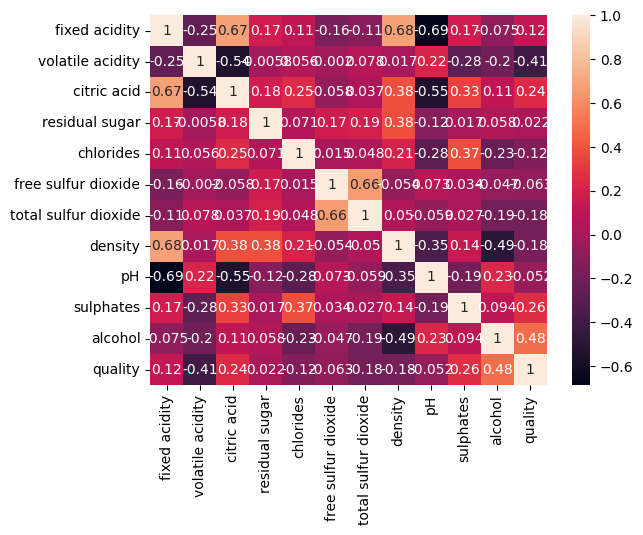

In [9]:
dataplot = sns.heatmap(df.corr(), annot=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


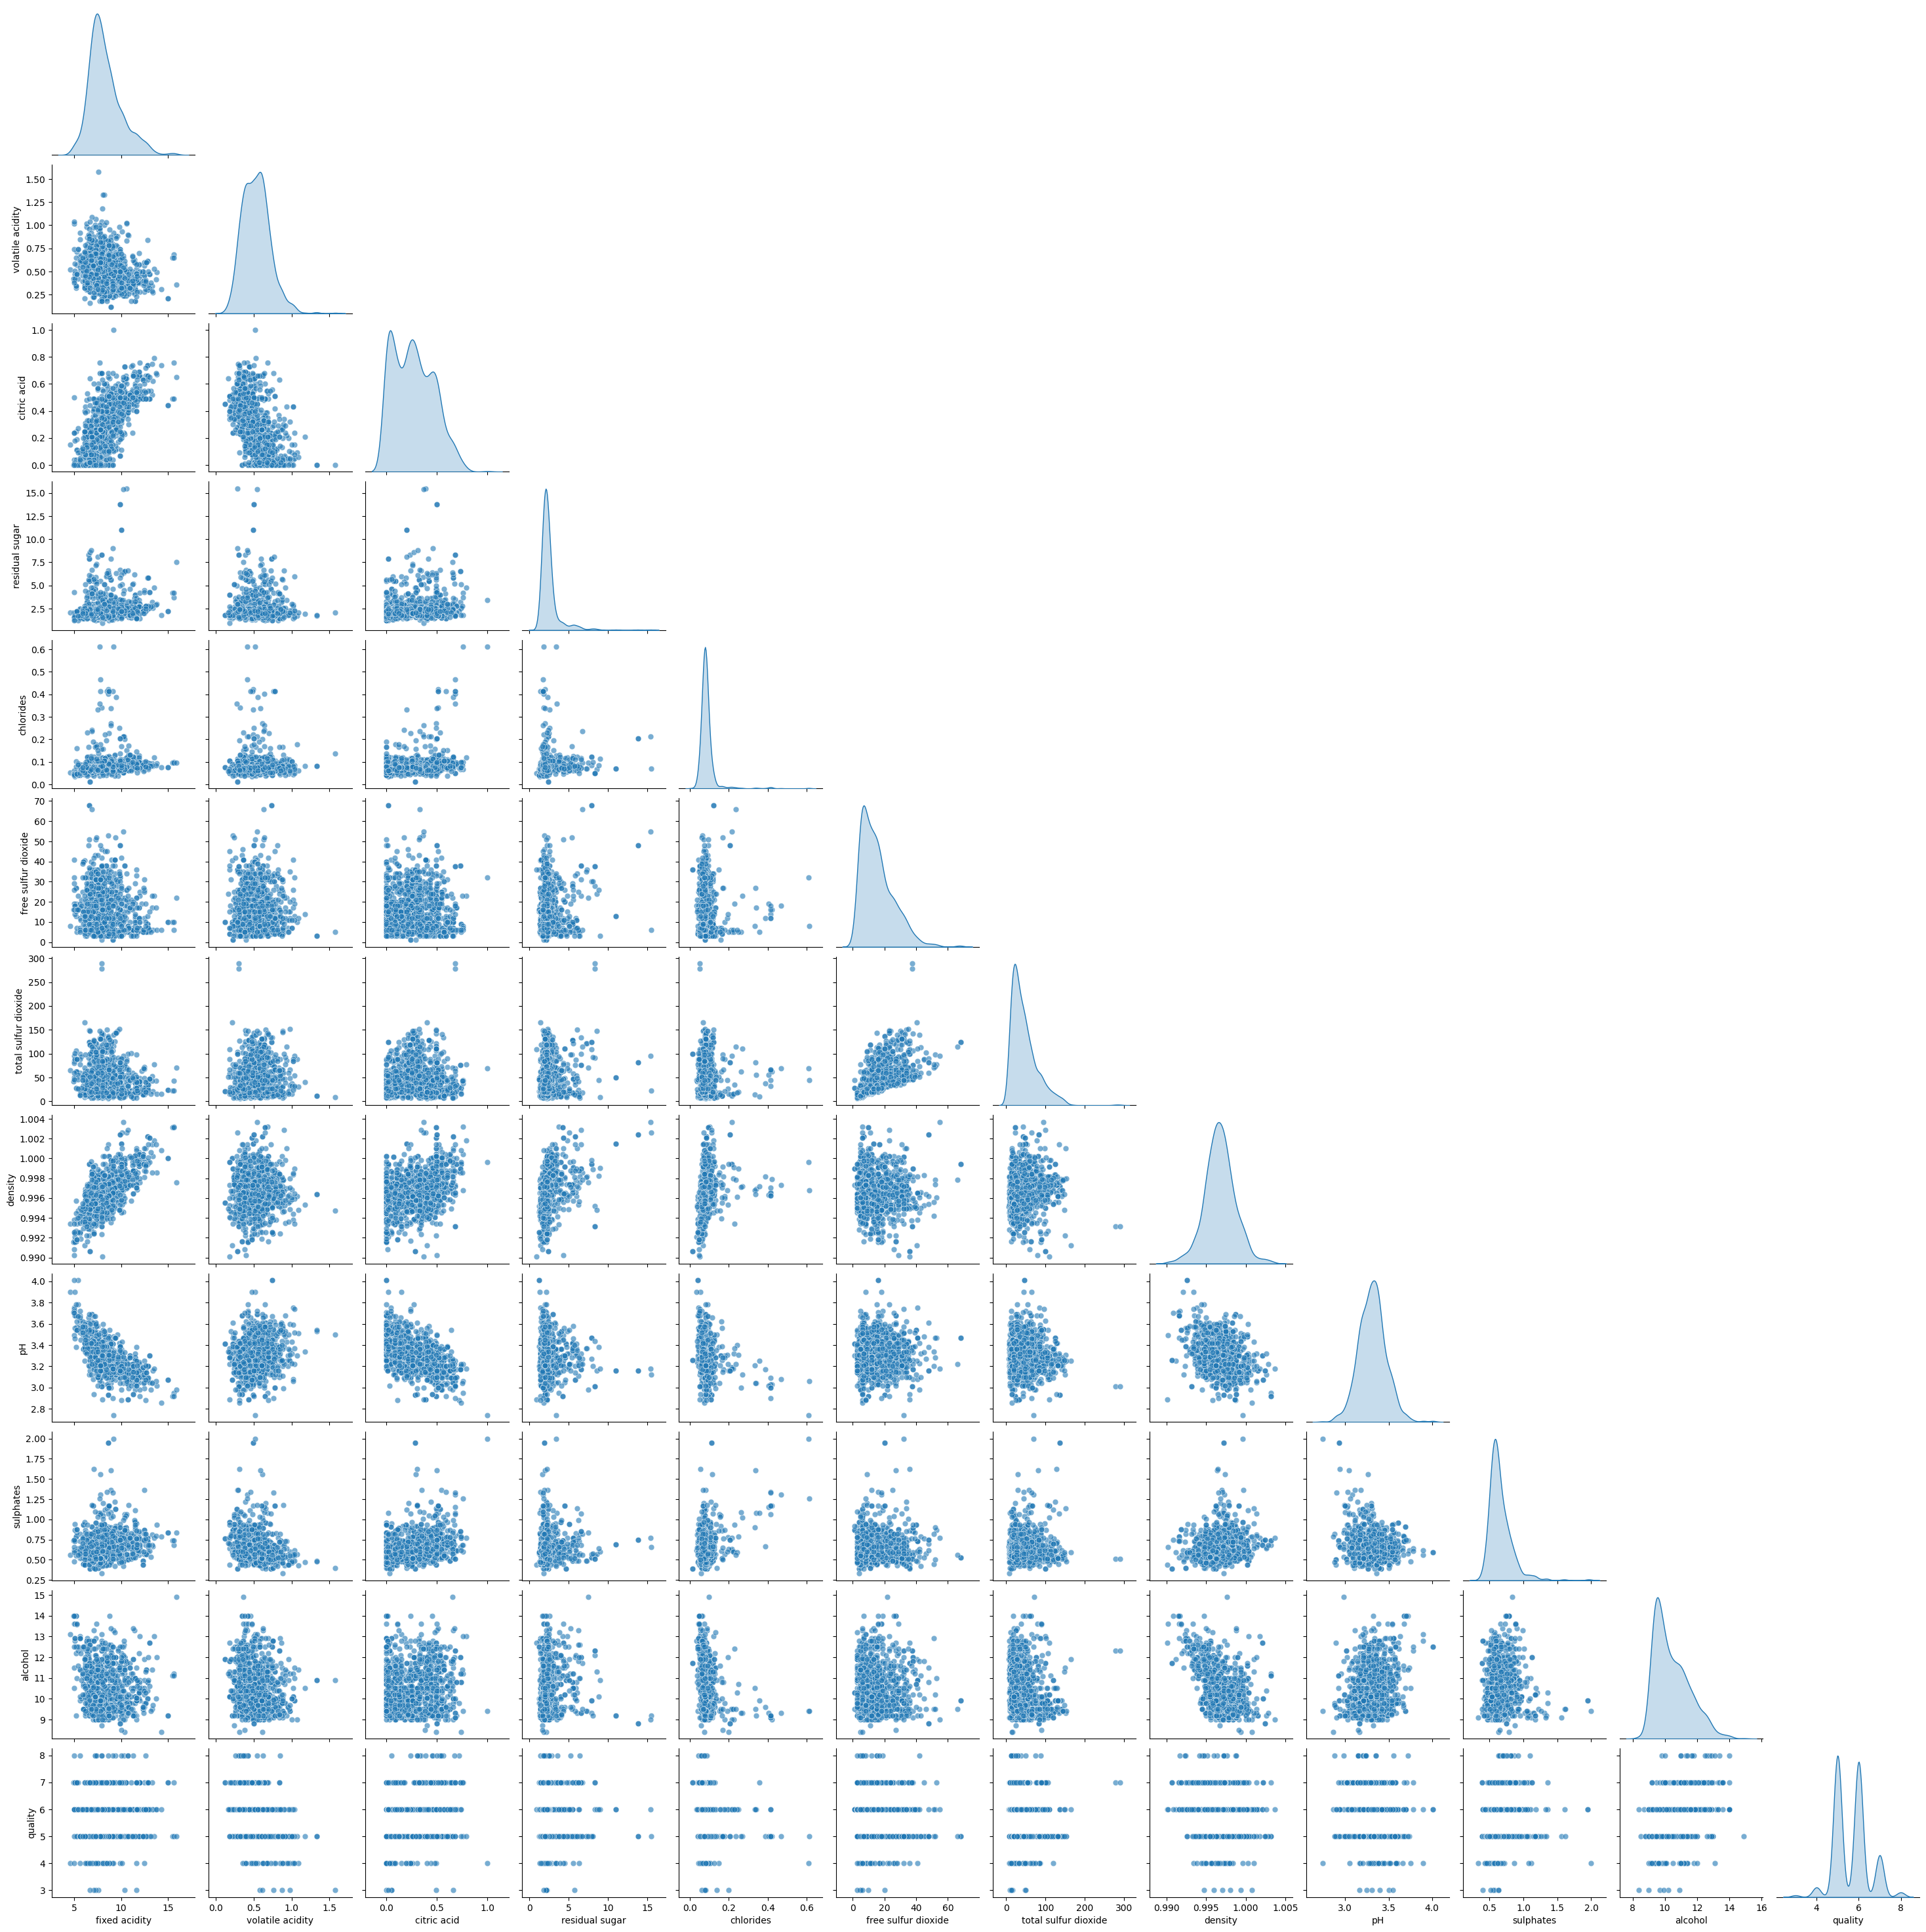

In [38]:
sns.pairplot(df, corner=True, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 40})


Como nossa variável alvo é uma variável categórica podemos procurar formar melhores de visualizar a influência de outras variáveis na target(alvo)

Uma forma bastante utilizada é o plot jitter que busca separar os pontos de forma que consigamos visualizar melhor os resultados
Referência utilizada: https://stats.stackexchange.com/questions/60856/what-is-the-best-way-to-visualize-relationship-between-discrete-and-continuous-v

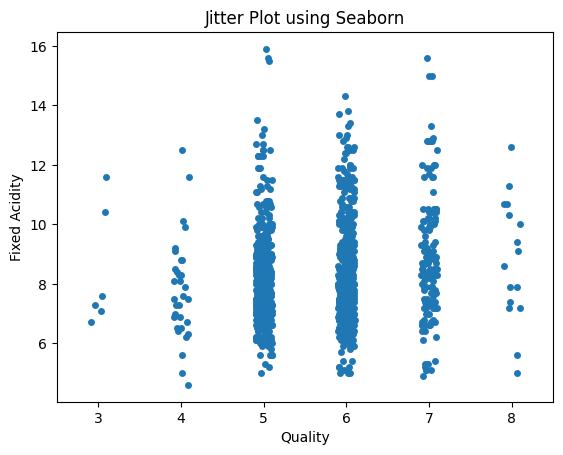

In [16]:
# Criando um jitter plot
sns.stripplot(x="quality", y="fixed acidity", data=df, jitter=True)
plt.title('Jitter Plot using Seaborn')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

Utilizando subplots para visualizar melhor a influência de todas variáveis na variável alvo
Referência utilizada: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

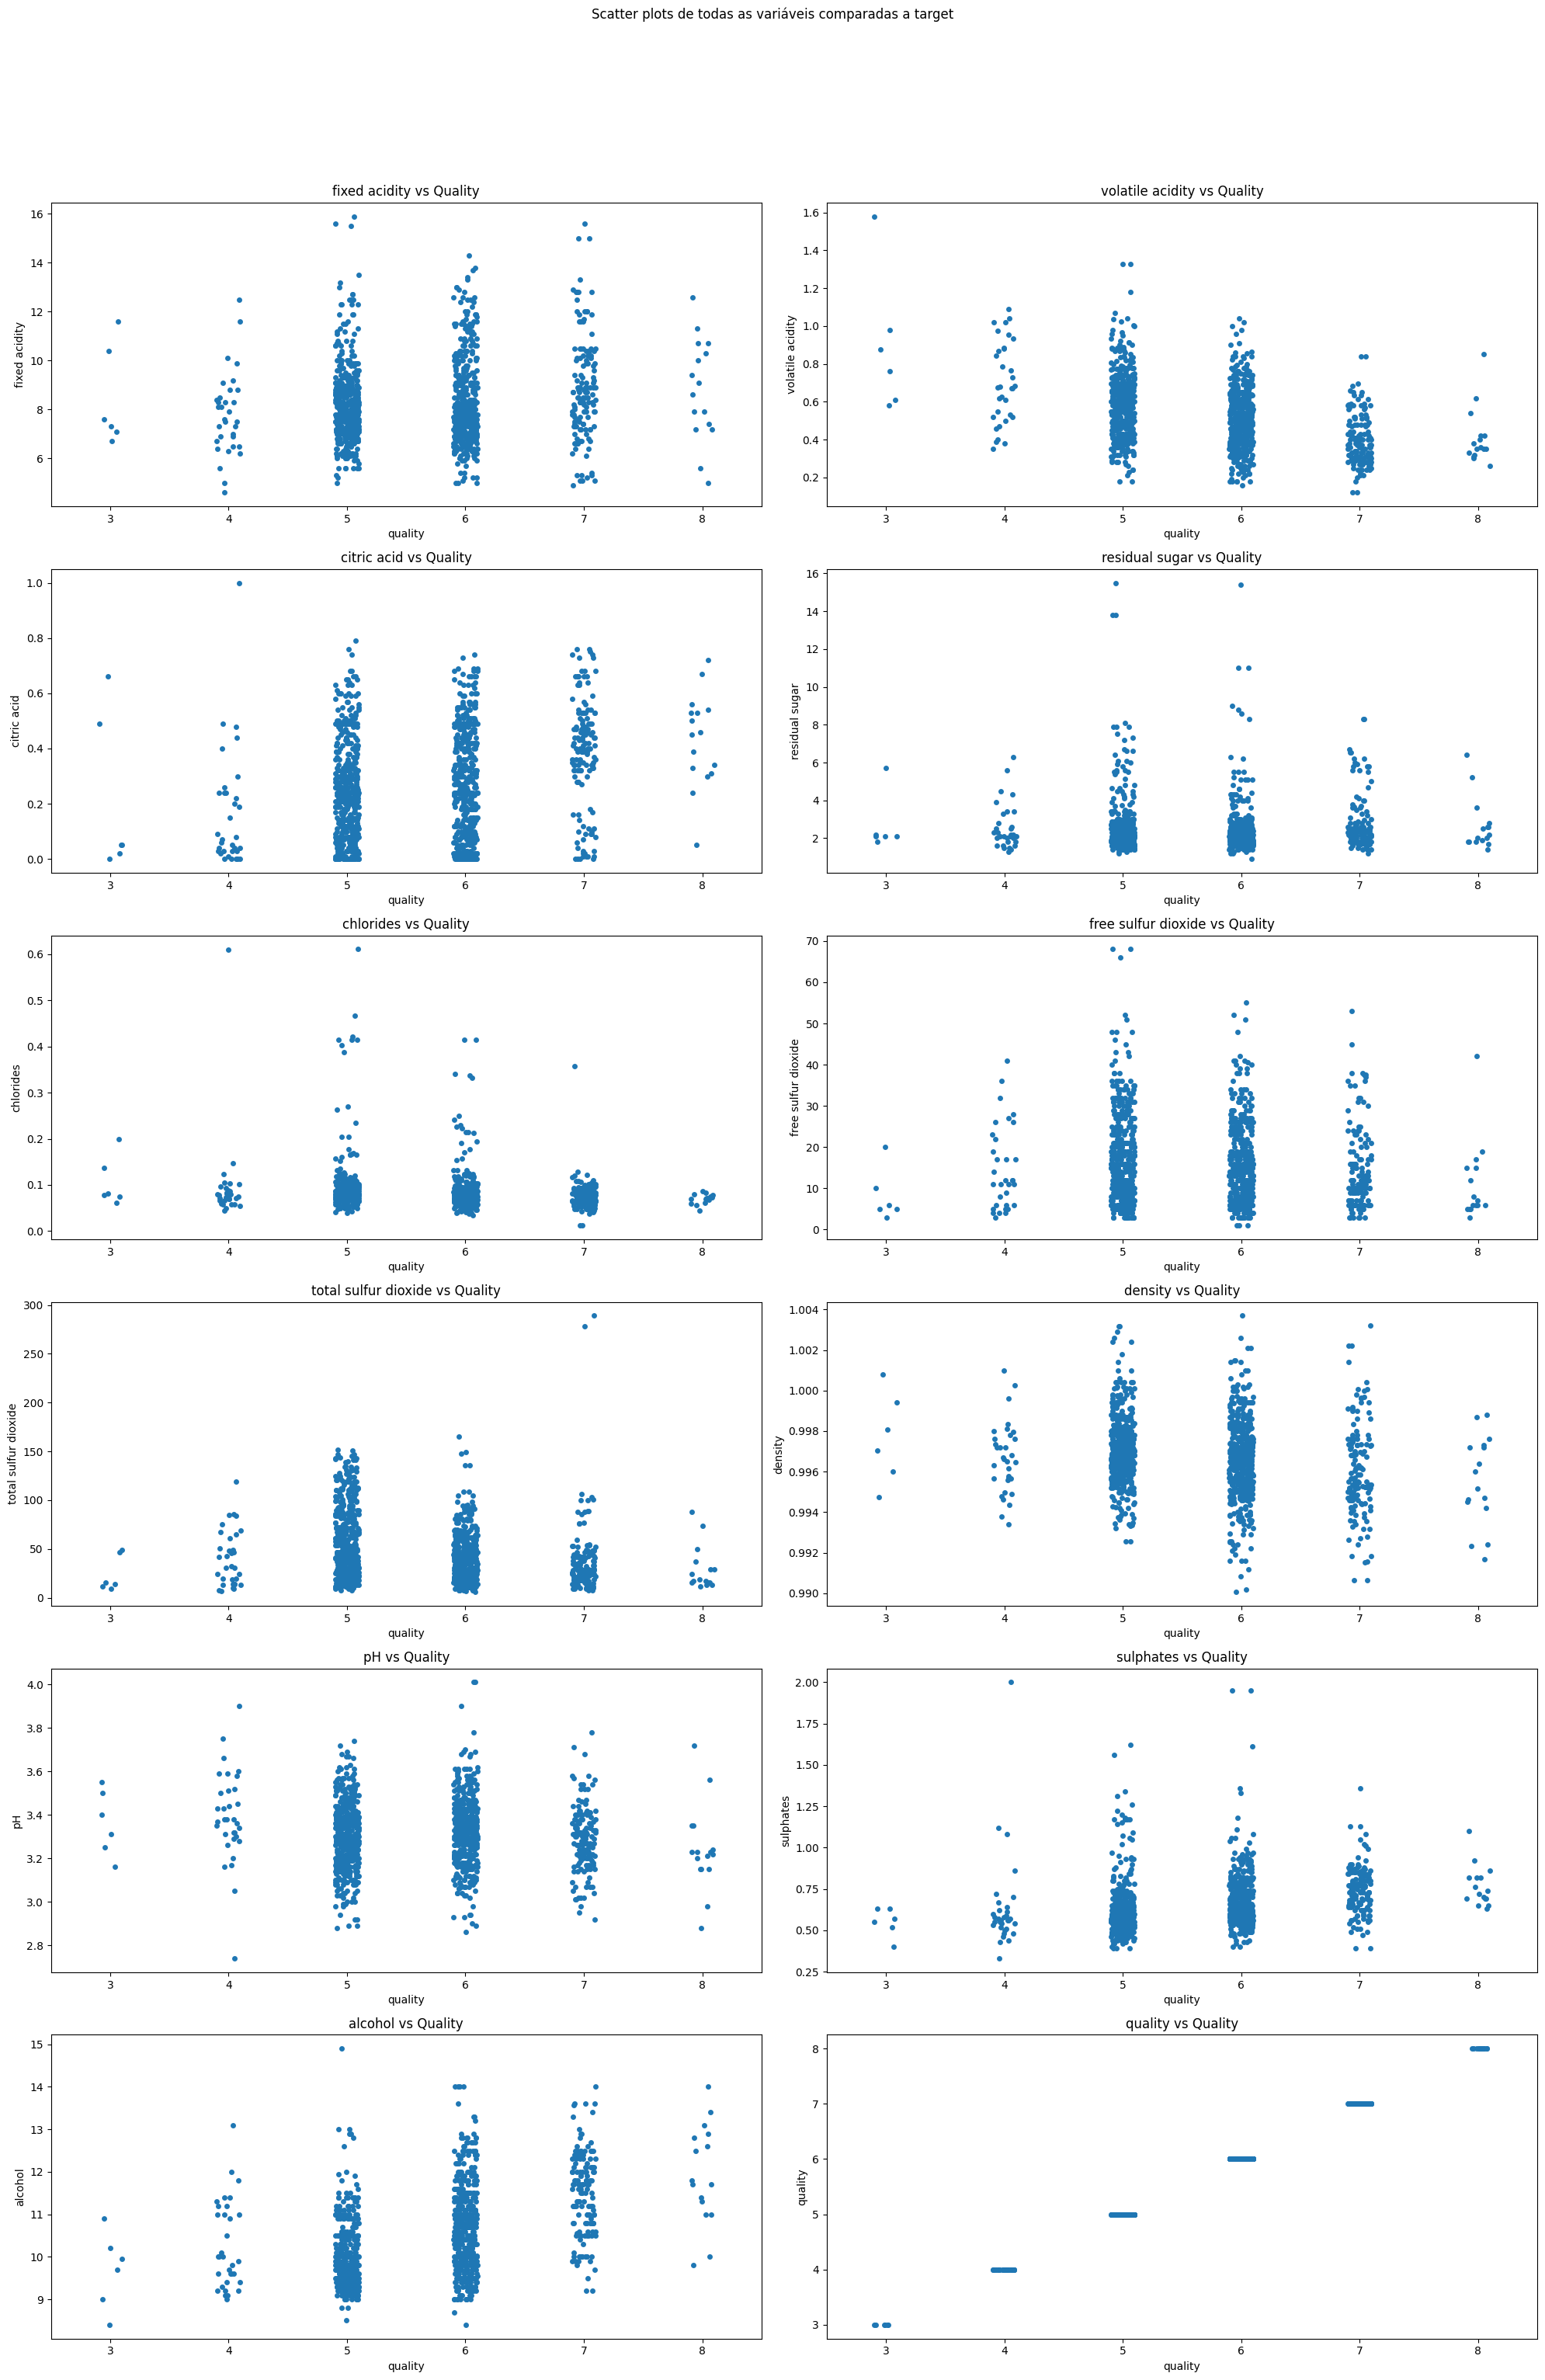

In [33]:
# Obter todas as colunas do DataFrame
columns = df.columns

# Definir o número de linhas e colunas para os subplots
n = len(columns)
ncols = 2
nrows = (n + 1) // ncols  # Calcular o número de linhas necessárias

fig, axs = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))
fig.suptitle('Scatter plots de todas as variáveis comparadas a target', y=1.02)

# Iterar sobre as colunas e plotar os gráficos
for i, col in enumerate(columns):
    row = i // ncols
    col_pos = i % ncols
    sns.stripplot(x="quality", y=col, data=df, jitter=True, ax=axs[row, col_pos])
    axs[row, col_pos].set_title(f'{col} vs Quality')

# Remover subplots vazios, se houver
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs.flatten()[j])

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()